# Flights Data Exploration
## by Daiki Kudo

## Investigation Overview

 In this investigation, I wanted to look at the domestic flight data in 2008 of US. The arrival delay is the total of departure time delay and elapsed time delay (in-flight time). The main focus was how each delay factor attributes to these 2 delays. The main focus of this project is DepartureDelay, ElapsedTimeDelay, Distance (between airports), and the AirTime. The delay factors I investigated in this project were "CarrierDelay", "WeatherDelay", "NASDelay",and "LateAircraftDelay". 

## Dataset Overview

 The data consists of approximately 7 million domestic records in United States. This records include date, distance, arrival time and other various features such as delay factors. Through the analysis, around 150000 flight data was removed. They are the flights which are canceled or diverted as well as the those whose origin or destination is in Hawaii.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set(style="whitegrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2008 = pd.read_csv("2008.csv")

In [3]:
# data wrangling, removing diamonds with inconsistent or missing data.
df = df_2008.copy()

df = df[(df.Cancelled==0) & (df.Diverted==0)]
df["delay_elapsed"] = df.ActualElapsedTime - df.CRSElapsedTime
df = df[ ~(df.index.isin([2486419,3698229])) ]
df = df.fillna(value = {"CarrierDelay":0,"WeatherDelay":0,"NASDelay":0,"SecurityDelay":0.,"LateAircraftDelay":0})
df = df[df.AirTime != 0]
df = df[(df.DepDelay > -120)]
hawaii = ["HNL", "OGG", "KOA"]
df = df[~df.isin(hawaii)]

df.shape[0]

6855011

In [4]:
# create dummy dataframe which are used to make plots.
# This dataframe which has 5 columns, delay type, delay time, DepDelay, delay_elapsed, distance
dummy = pd.DataFrame()
delay_types = ["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]

for type in delay_types:
    dum = pd.DataFrame()
    dum["time"] = df[df[type] != 0][type]
    dum["DepDelay"] = df[df[type] != 0]["DepDelay"]
    dum["delay_elapsed"] = df[df[type] != 0]["delay_elapsed"]
    dum["ArrDelay"] = df[df[type] != 0]["ArrDelay"]
    dum["Distance"] = df[df[type] != 0]["Distance"]
    dum["Delay Factor"] = type
    dummy = dummy.append(dum)
  
bin_edges1 = np.arange(0,600,200)
bin_edges2 = np.arange(0,2000,400)
dummy["elapsed_blocked"] = pd.cut(dummy.delay_elapsed, bin_edges1, right=False, include_lowest=True)
dummy["depdelay_blocked"] = pd.cut(dummy.DepDelay, bin_edges2, right=False, include_lowest=True)

## Distribution of Arrival Delay

Arrival delay in the dataset takes on a very large range of values, most of them are from about -60 to about 240 minutes. Negative value means the plane arrived earlier than scheduled. The mode of the distribution is at around 0 minute, as is easily expected. 

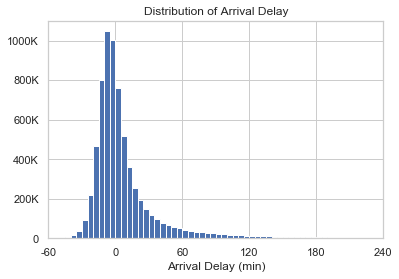

In [5]:
bin = np.arange(-100, 240, 5)
plt.hist(data=df, x="ArrDelay", bins=bin)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (min)")
plt.xlim(-60,240)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,1200000,200000),[0,"200K","400K","600K","800K","1000K"]);

## Distribution of DepartureTime-Delay / ElapsedTime-Delay

The distributions of Departure Delay and Elapsed Time Delay account for the arrival delay. Though Departure Delay was left skewed and takes rather higher values, the Elapsed Time Delay is symmetric and takes rather lower values.

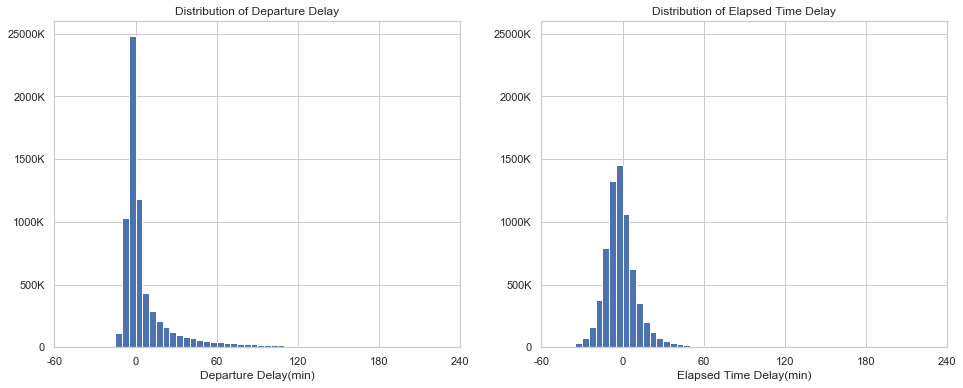

In [6]:
# plot the histgram again in the limit of [-50<x<200]
bin = np.arange(-100, 240, 5)
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.hist(data=df, x="DepDelay",bins=bin)
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

plt.subplot(1,2,2)
plt.hist(data=df, x="delay_elapsed",bins=bin)
plt.title("Distribution of Elapsed Time Delay")
plt.xlabel("Elapsed Time Delay(min)")
plt.xlim(-60,240)
plt.ylim(0,2600000)
plt.xticks(np.arange(-60,300,60),np.arange(-60,300,60))
plt.yticks(np.arange(0,3000000,500000),[0,"500K","1000K","1500K","2000K","25000K"]);

## DepDelay vs. ElapsedTimeDelay / DepDelay vs. ArrDelay / ElapsedTimeDelay vs. ArrDelay

The left plot shows the relationship between Departure Delay and Elapsed Time Delay. It reveals that Departure Delay is generally far longer than Elapsed Time Delay. The one on the center suggests that Departure Delay strongly affects Arrival Delay. On the other hand, in the left plot, even though the Arrival Delay can be longer as Elapsed Time Delay gets longer, this tendency is limited because Elapsed Time Delay is in the range under 500.

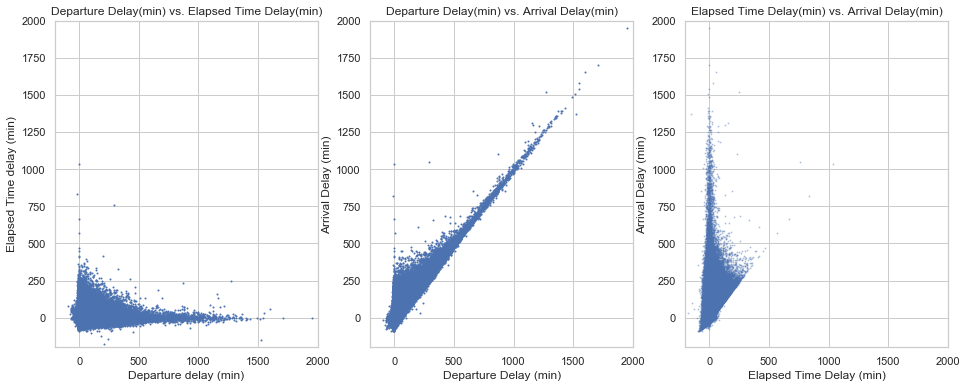

In [7]:
plt.figure(figsize=[16,6])

plt.subplot(1,3,1)
plt.title("Departure Delay(min) vs. Elapsed Time Delay(min)")
plt.scatter(data=df, x="DepDelay", y="delay_elapsed", s=1)
plt.xlabel("Departure delay (min)")
plt.ylabel("Elapsed Time delay (min)");
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,2)
plt.title("Departure Delay(min) vs. Arrival Delay(min)")
plt.scatter(data=df, x="DepDelay", y="ArrDelay", s=1)
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

plt.subplot(1,3,3)
plt.title("Elapsed Time Delay(min) vs. Arrival Delay(min)")
plt.scatter(data=df, x="delay_elapsed", y="ArrDelay", s=1,alpha=0.3)
plt.xlabel("Elapsed Time Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.xlim([-200,2000])
plt.ylim([-200,2000]);

## Attributes of 4 Delay Factors (1. Occurence Rates) 

NSA Delay was the most prevalent delay factor in 2008 and it happened around once every 7 flights. The Late Aircraft Delay and Carrier Delay followed with around 10 % each. The Weather Delay rarely happened and the occurence rate was below 2%.

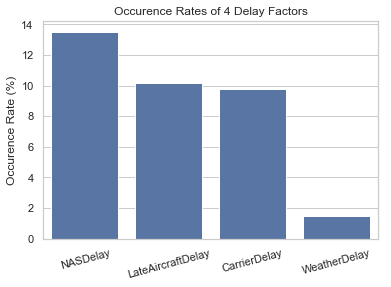

In [8]:
# The proportion where each type of delay occurs.
p_car = df[df.CarrierDelay != 0].shape[0] / df.shape[0] *100
p_wea = df[df.WeatherDelay != 0].shape[0] / df.shape[0] *100
p_nas = df[df.NASDelay != 0].shape[0] / df.shape[0] *100
p_sec = df[df.SecurityDelay != 0].shape[0] / df.shape[0] *100
p_airc = df[df.LateAircraftDelay != 0].shape[0] / df.shape[0] *100

delays = pd.Series([p_nas,p_airc,p_car,p_wea], index=["NASDelay","LateAircraftDelay","CarrierDelay","WeatherDelay"]).sort_values(ascending=False)
sb.barplot(delays.index, delays)
plt.xticks(rotation=15)
plt.title("Occurence Rates of 4 Delay Factors")
plt.ylabel("Occurence Rate (%)");

## Attributes of 4 Delay Factors (2. Distribution of Delay Time)

This shows the distribution of the length of delay each factor generates. 2 graphs are actually the same and one on the right is just an enlarged version. Even though Carrier Delay has some extremely higher outliers, distribution of these 4 values is not significantly different.

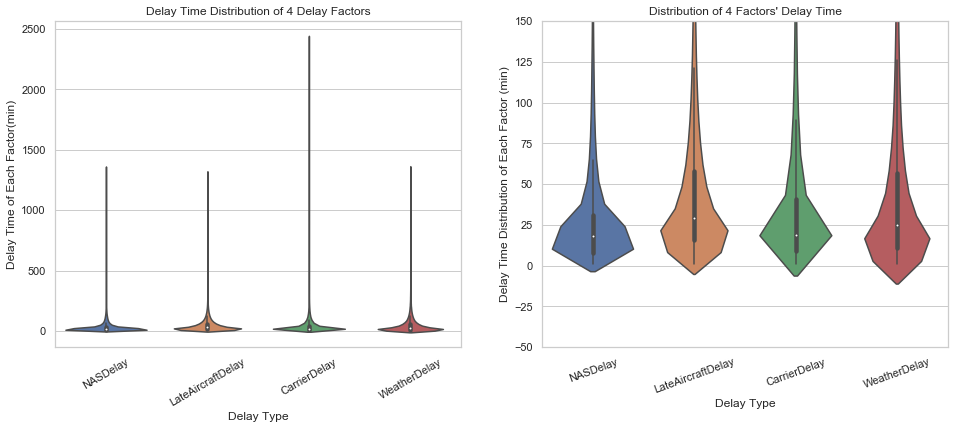

In [9]:
# take a look at the distribution on how many minutes each delay factor can prolong the flight time
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title("Delay Time Distribution of 4 Delay Factors")
sb.violinplot(data= dummy, x="Delay Factor", y="time")
plt.xlabel("Delay Type")
plt.ylabel("Delay Time of Each Factor(min)")
plt.xticks(rotation=30);

plt.subplot(1,2,2)
plt.title("Distribution of 4 Factors' Delay Time")
sb.violinplot(data= dummy, x="Delay Factor", y="time")
plt.xlabel("Delay Type")
plt.ylabel("Delay Time Distribution of Each Factor (min)")
plt.ylim([-50,150])
plt.xticks(rotation=20);

## Distance vs. ArrDelay / Distance vs. DepDelay / Distance vs. ElapsedTimeDelay

Plots in this part suggest a interesting fact. Long distance is not linked with long delay. 

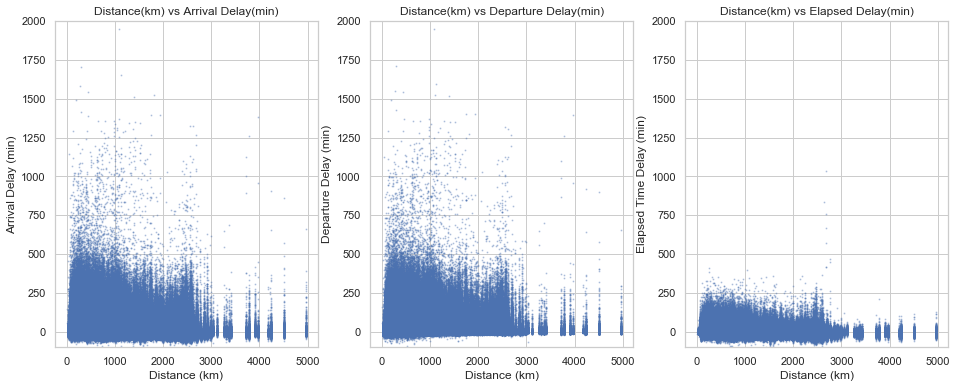

In [14]:
plt.figure(figsize=[16,6])

plt.subplot(1,3,1)
plt.title("Distance(km) vs Arrival Delay(min)")
plt.scatter(data=df, x="Distance", y="ArrDelay", s=1, alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Arrival Delay (min)")
plt.ylim([-100,2000]);

plt.subplot(1,3,2)
plt.title("Distance(km) vs Departure Delay(min)")
plt.scatter(data=df, x="Distance", y="DepDelay", s=1, alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Departure Delay (min)")
plt.ylim([-100,2000]);

plt.subplot(1,3,3)
plt.title("Distance(km) vs Elapsed Delay(min)")
plt.scatter(data=df, x="Distance", y="delay_elapsed", s=1, alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Elapsed Time Delay (min)")
plt.ylim([-100,2000]);

## Distance vs. 4 Delay Factors

This part supports the fact which was revealed in the last part. Even if I break these delays down into 4 factors, these do not show the clear relationship with distance.

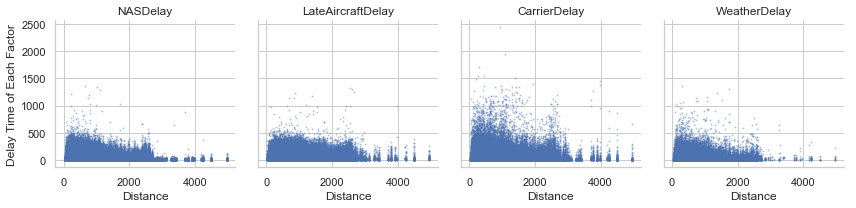

In [15]:
g = sb.FacetGrid(data=dummy, col="Delay Factor")
g.map(plt.scatter, "Distance", "time", s=1, alpha=0.3)
g.set_ylabels("Delay Time of Each Factor")
g.set_titles("{col_name}");

## Distribution of 4 Delay Factors Clustered by Length of Departure Delay

I visualized how 4 delay factors are distributed by clustering the Departure Delay time length into 4 levels.  
It was found that the longer Departure Delay time is, the more it is associated with with longer CarrierDelay and WeatherDelay.

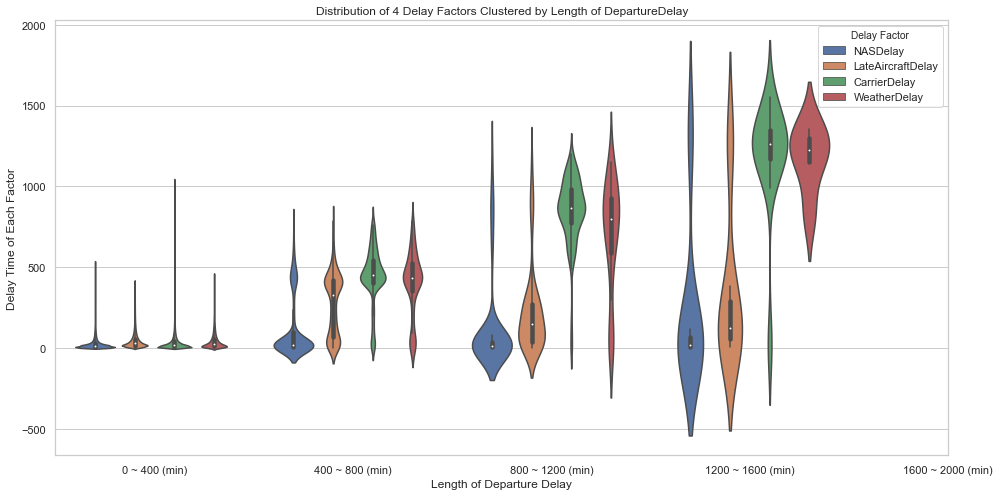

In [12]:
plt.figure(figsize=[16,8])
sb.violinplot(data=dummy, hue="Delay Factor", y="time", x="depdelay_blocked")
plt.title("Distribution of 4 Delay Factors Clustered by Length of DepartureDelay")
plt.xlabel("Length of Departure Delay")
plt.ylabel("Delay Time of Each Factor")
plt.xticks([0,1,2,3,4],["0 ~ 400 (min)","400 ~ 800 (min)", "800 ~ 1200 (min)","1200 ~ 1600 (min)","1600 ~ 2000 (min)"]);

## Distribution of 4 Delay Factors Clustered by Length of ElapsedTimeDelay

Reproducing the same plot with 2 levels of ElapsedTimeDelay instead of DepartureDelay shows that only NAS Delay factor is associated with longer DepartureDelay.

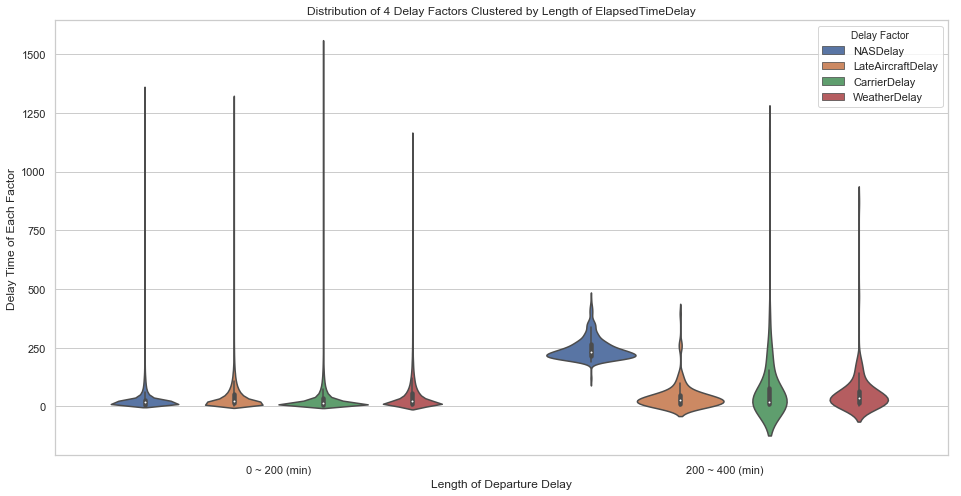

In [13]:
plt.figure(figsize=[16,8])
sb.violinplot(data=dummy, hue="Delay Factor", y="time", x="elapsed_blocked")
plt.title("Distribution of 4 Delay Factors Clustered by Length of ElapsedTimeDelay")
plt.xlabel("Length of Departure Delay")
plt.ylabel("Delay Time of Each Factor")
plt.xticks([0,1],["0 ~ 200 (min)","200 ~ 400 (min)"]);